<a href="https://colab.research.google.com/github/shreyassy/Mini-Project__Image-Classification/blob/master/FashionMNISTImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from skimage.io import imread

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
fashion_train = pd.read_csv('/content/drive/My Drive/FashionMNISTData/fashion-mnist_train.csv')
fashion_test = pd.read_csv('/content/drive/My Drive/FashionMNISTData/fashion-mnist_test.csv')


In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [5]:
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
df_train = fashion_train.copy()
df_test = fashion_test.copy()

In [7]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [8]:
print('Train Shape:',df_train.shape)
print('Test Shape:',df_test.shape)

Train Shape: (60000, 785)
Test Shape: (10000, 785)


In [9]:
df_train.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [10]:
df_train.isnull().any().sum()

0

In [11]:
df_test.isnull().any().sum()

0

In [12]:
clothing = {0 : 'T-shirt/top',1 : 'Trouser',2 : 'Pullover',3 : 'Dress',4 : 'Coat',
            5 : 'Sandal',6 : 'Shirt',7 : 'Sneaker',8 : 'Bag',9 : 'Ankle boot'}

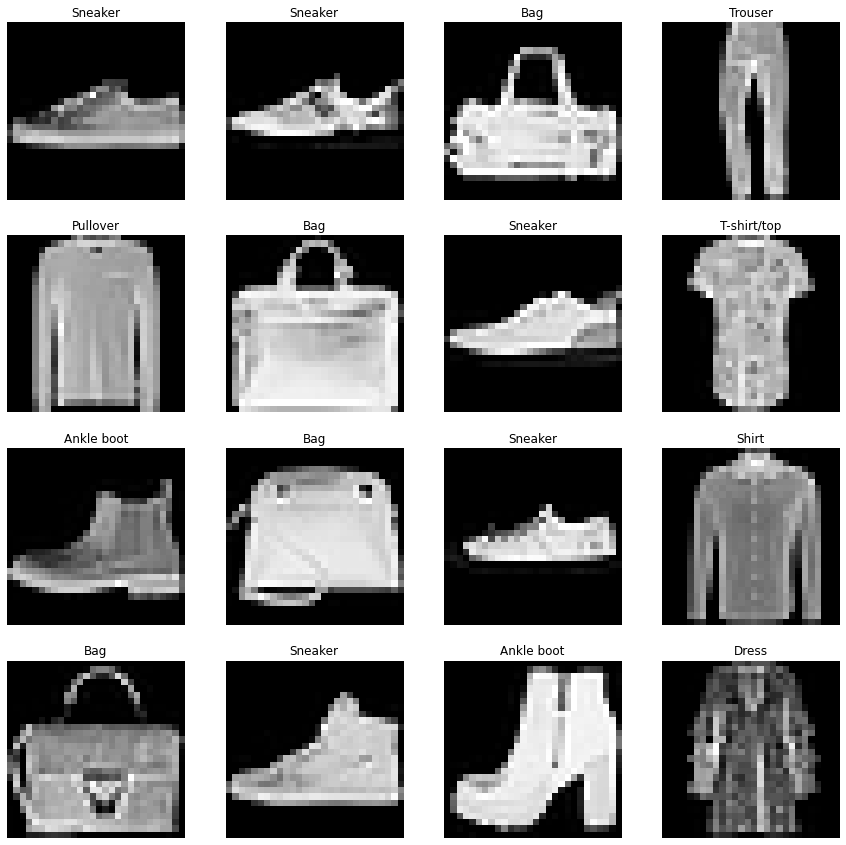

In [13]:
figure,axes = plt.subplots(4,4,figsize = (15,15))
for i in axes:
  for img in i:
    index = np.random.randint(60000)
    image = df_train.drop('label',axis = 1).values[index].reshape(28,28)
    c = df_train['label'][index]
    img.imshow(image,cmap = 'gray')
    img.set_title(clothing[c])
    img.set_axis_off()

In [14]:
X = fashion_train.iloc[:20000,1:].values
y = fashion_train.iloc[:20000,0].values

In [15]:
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [16]:
X_test = fashion_test.iloc[:3000,1:].values
y_test = fashion_test.iloc[:3000,0].values

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.25)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [ ]:
model_decisiontree = DecisionTreeClassifier()
model_decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_decisiontree_pred = model_decisiontree.predict(X_valid)

In [ ]:
print(confusion_matrix(y_valid,y_decisiontree_pred))
print(classification_report(y_valid,y_decisiontree_pred))

[[391   3  15  29   4   1  81   0   3   1]
 [  7 468   0  18   2   0   4   0   2   0]
 [ 13   4 308   6  80   0  74   0   4   1]
 [ 28  18   8 370  34   0  23   0   5   0]
 [  6   4  98  37 314   1  76   0   9   0]
 [  0   0   1   3   0 419   4  39   8  16]
 [ 69   4  74  24  52   3 239   0   7   1]
 [  1   0   0   0   0  39   1 445   2  34]
 [  7   0   9   8   5  11   7   5 424   2]
 [  0   0   2   0   2  10   1  42   3 427]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       528
           1       0.93      0.93      0.93       501
           2       0.60      0.63      0.61       490
           3       0.75      0.76      0.75       486
           4       0.64      0.58      0.61       545
           5       0.87      0.86      0.86       490
           6       0.47      0.51      0.49       473
           7       0.84      0.85      0.85       522
           8       0.91      0.89      0.90       478
           9       0.89     

In [19]:
model_randomforest = RandomForestClassifier(criterion  = 'entropy')
model_randomforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_randomforest_pred  = model_randomforest.predict(X_valid)

In [21]:
print(confusion_matrix(y_valid,y_randomforest_pred))
print(classification_report(y_valid,y_randomforest_pred))

[[441   0   2  20   0   1  35   0   4   0]
 [  2 495   4  13   0   0   4   0   1   0]
 [  6   0 389   3  54   0  40   0   6   0]
 [ 13   1   6 468  18   0  18   0   1   0]
 [  0   0  44  21 391   0  29   0   2   0]
 [  0   0   0   0   0 428   0  18   0   6]
 [ 88   1  58  12  54   1 277   0  12   0]
 [  0   0   0   0   0  12   0 522   0  17]
 [  0   2   2   2   4   3   5   2 476   0]
 [  0   0   0   0   0   6   1  20   2 437]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       503
           1       0.99      0.95      0.97       519
           2       0.77      0.78      0.78       498
           3       0.87      0.89      0.88       525
           4       0.75      0.80      0.78       487
           5       0.95      0.95      0.95       452
           6       0.68      0.55      0.61       503
           7       0.93      0.95      0.94       551
           8       0.94      0.96      0.95       496
           9       0.95     

In [ ]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_logistic_pred = model_logistic.predict(X_valid)

In [ ]:
print(confusion_matrix(y_valid,y_logistic_pred))
print(classification_report(y_valid,y_logistic_pred))

[[437   3   8  31   1   0  41   0   6   1]
 [  2 479   3  12   3   0   2   0   0   0]
 [  6   1 360   8  50   1  59   0   5   0]
 [ 12  10   4 414  21   0  21   0   4   0]
 [  0   1  58  22 406   0  56   0   2   0]
 [  0   0   1   0   0 444   0  21   4  20]
 [ 80   2  46  10  40   0 288   0   7   0]
 [  0   0   0   0   0  13   0 489   3  17]
 [  2   0   4   7   0   0  13   3 448   1]
 [  0   0   0   0   0  10   0  18   2 457]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       528
           1       0.97      0.96      0.96       501
           2       0.74      0.73      0.74       490
           3       0.82      0.85      0.84       486
           4       0.78      0.74      0.76       545
           5       0.95      0.91      0.93       490
           6       0.60      0.61      0.60       473
           7       0.92      0.94      0.93       522
           8       0.93      0.94      0.93       478
           9       0.92     

In [40]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
y_knn_pred = model_knn.predict(X_valid)

In [42]:
print(confusion_matrix(y_valid,y_knn_pred))
print(classification_report(y_valid,y_knn_pred))

[[450   0   8  10   0   0  34   0   1   0]
 [  3 493   4  15   1   0   3   0   0   0]
 [ 11   1 375   4  58   0  48   0   1   0]
 [ 28   4  11 437  31   0  14   0   0   0]
 [  3   0  65  18 352   0  48   0   1   0]
 [  3   0   0   1   0 361   3  59   1  24]
 [ 94   0  76   9  41   0 277   1   5   0]
 [  0   0   0   0   0   3   0 524   0  24]
 [  2   1  10   2   4   0   9   8 460   0]
 [  0   0   1   0   0   2   1  20   0 442]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       503
           1       0.99      0.95      0.97       519
           2       0.68      0.75      0.72       498
           3       0.88      0.83      0.86       525
           4       0.72      0.72      0.72       487
           5       0.99      0.80      0.88       452
           6       0.63      0.55      0.59       503
           7       0.86      0.95      0.90       551
           8       0.98      0.93      0.95       496
           9       0.90     

In [43]:
model_naivebayes = GaussianNB()
model_naivebayes.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
y_naivebayes_pred = model_naivebayes.predict(X_valid)

In [45]:
print(confusion_matrix(y_valid,y_naivebayes_pred))
print(classification_report(y_valid,y_naivebayes_pred))

[[314  13  10 117  28   0  10   0  11   0]
 [  0 470   1  42   1   0   4   0   1   0]
 [  0   4 188  56 227   0  15   0   8   0]
 [  4   5   6 495   7   0   7   0   1   0]
 [  0   1  20 129 331   0   2   0   4   0]
 [  0   0   0   1   0 110   0 324   5  12]
 [ 47   2  65 138 203   0  24   0  24   0]
 [  0   0   0   0   0   1   0 541   2   7]
 [  0   0  16  60  66   4  13   1 336   0]
 [  0   0   2   0   0   6   2 181   7 268]]
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       503
           1       0.95      0.91      0.93       519
           2       0.61      0.38      0.47       498
           3       0.48      0.94      0.63       525
           4       0.38      0.68      0.49       487
           5       0.91      0.24      0.38       452
           6       0.31      0.05      0.08       503
           7       0.52      0.98      0.68       551
           8       0.84      0.68      0.75       496
           9       0.93     

In [29]:
model_svm = SVC(C = 10)
model_svm.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
y_svm_pred = model_svm.predict(X_valid)

In [31]:
print(confusion_matrix(y_valid,y_svm_pred))
print(classification_report(y_valid,y_svm_pred))

[[437   1   5   8   0   0  51   0   1   0]
 [  1 504   1   8   2   0   3   0   0   0]
 [  6   1 397   7  39   0  46   0   2   0]
 [ 20   4   5 451  26   0  18   0   1   0]
 [  2   0  34  18 399   0  33   0   1   0]
 [  1   0   0   0   0 428   0  17   0   6]
 [ 75   1  46  11  36   0 330   0   4   0]
 [  0   0   0   0   0   7   0 528   0  16]
 [  4   1   4   0   1   1   3   4 478   0]
 [  0   0   0   1   0   6   0  14   0 445]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       503
           1       0.98      0.97      0.98       519
           2       0.81      0.80      0.80       498
           3       0.89      0.86      0.88       525
           4       0.79      0.82      0.81       487
           5       0.97      0.95      0.96       452
           6       0.68      0.66      0.67       503
           7       0.94      0.96      0.95       551
           8       0.98      0.96      0.97       496
           9       0.95     

In [ ]:
#I have updated the C value to 0.1 from the grid search output

In [46]:
model_linearsvm = LinearSVC()
model_linearsvm.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [47]:
y_linearsvm_pred = model_linearsvm.predict(X_valid)

In [48]:
print(confusion_matrix(y_valid,y_linearsvm_pred))
print(classification_report(y_valid,y_linearsvm_pred))

[[426   2   8  19   3   0  38   0   7   0]
 [  1 495   3  14   0   0   2   0   3   1]
 [  8   2 352   9  77   0  46   0   4   0]
 [ 21  12  11 435  21   0  22   0   3   0]
 [  3   1  39  17 372   0  51   0   4   0]
 [  0   0   1   0   1 417   0  20   3  10]
 [ 81   3  69  21  65   0 249   0  15   0]
 [  0   0   0   1   0  19   0 504   2  25]
 [  6   2  10   5   3   5  13   6 446   0]
 [  0   0   0   1   0   8   0  22   2 433]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       503
           1       0.96      0.95      0.96       519
           2       0.71      0.71      0.71       498
           3       0.83      0.83      0.83       525
           4       0.69      0.76      0.72       487
           5       0.93      0.92      0.93       452
           6       0.59      0.50      0.54       503
           7       0.91      0.91      0.91       551
           8       0.91      0.90      0.91       496
           9       0.92     

In [ ]:
# SVC and RandomForest have the highest accuracy 
# so we'll apply cross_val_score on both and compare.

In [34]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model_randomforest,X= X_train,y = y_train,cv = 10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation:{:.2f} %'.format(accuracies.std()*100))

Accuracy: 86.57 %
Standard Deviation:0.85 %


In [ ]:
accuracies_svm = cross_val_score(estimator = model_svm,X= X_train,y = y_train,cv = 10)
print('Accuracy_2: {:.2f} %'.format(accuracies_svm.mean()*100))
print('Standard Deviation:{:.2f} %'.format(accuracies_svm.std()*100))

In [53]:
#from sklearn.model_selection import GridSearchCV
#parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
#grid_search = GridSearchCV(estimator = model_svm,
#                           param_grid = parameters,
#                           scoring = 'accuracy',
#                          cv = 5,
#grid_search = grid_search.fit(X_train, y_train)
#best_accuracy = grid_search.best_score_
#best_parameters = grid_search.best_params_
#print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
#print("Best Parameters:", best_parameters)

In [32]:
y_test_pred = model_svm.predict(X_test)
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[258   0   6   6   1   0  28   0   3   0]
 [  1 270   0   7   0   0   3   0   0   0]
 [  5   0 228   3  29   0  31   0   2   0]
 [ 15   3   5 271  11   0   5   0   1   0]
 [  0   0  30   9 247   0  15   0   0   0]
 [  0   0   0   0   0 286   0  14   0   5]
 [ 46   1  18   7  22   0 209   0   4   0]
 [  0   0   0   0   0   5   0 260   0  16]
 [  2   0   2   1   1   1   3   0 288   0]
 [  0   0   0   0   0   1   0  16   0 299]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       302
           1       0.99      0.96      0.97       281
           2       0.79      0.77      0.78       298
           3       0.89      0.87      0.88       311
           4       0.79      0.82      0.81       301
           5       0.98      0.94      0.96       305
           6       0.71      0.68      0.70       307
           7       0.90      0.93      0.91       281
           8       0.97      0.97      0.97       298
           9       0.93     

In [39]:
from sklearn.metrics import accuracy_score
print('Accuracy : {:.2f} %'.format(accuracy_score(y_test,y_test_pred)*100))

Accuracy : 87.20 %


In [54]:
#This is the final accuracy on the test data.
#Accuracy = 87.20%